In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from ML2_lib import valid

In [2]:
A = np.arange(100)
valid.median_of_means(n_blocks=10,seq=A)

51.7

In [41]:
trial_num = 100 #試行回数
result_gauss = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_gauss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
check_k_num = 100 # 分割数　1 ~ check_k_num
rng = np.random.default_rng()
w_star = 1
X_mean = 5
X_var = 2
X_test = rng.normal(loc=X_mean,size=10,scale=X_var)
Y_test = noise.Gauss(sigma=2.2,dim=X_test.shape[0],n=1).generate() + X_test


for _ in tqdm(range(trial_num)):


    w_per_trial = [] # モデルを貯めていく、必要かどうか
    loss_store = [] # 過剰期待損失を貯めていく
    a = 0.01 # 学習率
    c = 5 # wの初期値がとりうる範囲
    n = 250 # データセットのサンプル数
    b = 2.2 # ノイズの分散
    # 初期値wの決定
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,check_k_num+1):
        core_store = []
        model_store = []
        valid_loss_store = []



        son = loss.LinearQuadraticLoss()
        for _ in range(k):
            # nがデータセットのサンプル数、train_numはその半分
            train_num = n // 2
            # core_num は　k分割した後のサンプル数、
            core_num = train_num  // k
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]

            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)


        # ここまでで学習は終了,モデルの候補がk個ある
        # ここからモデルの選択
        valid_num = n // 2
        rng = np.random.default_rng()
        X = rng.normal(loc=X_mean,size=valid_num,scale=X_var)
        Y = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate() + X
        tmp_loss = []
        # for文を使っているので要修正
        for i in range(k):
            for j in range(k):
                core_num = valid_num // k
                tmp_loss.append(son.f(Y[j:j+core_num],X[j:j+core_num],model_store[i]))
            valid_loss_store.append(valid.median_of_means(seq=np.array(tmp_loss),n_blocks=3))

        index = np.argmin(valid_loss_store)
        w_rv = model_store[index]
        loss_k = np.mean(son.f(y=Y_test,x=X_test,w=w_rv))
        w_per_trial.append(w_rv)
        loss_store.append(loss_k)

    result_gauss.append(np.array(w_per_trial))
    result_loss_gauss.append(np.array(loss_store))


result_gauss = np.array(result_gauss)
result_loss_gauss = np.array(result_loss_gauss)






  0%|          | 0/100 [00:00<?, ?it/s]

1.104774735406372
1.1249877851960246
0.7799533165856167
1.0758626735029362
1.0601198051873075
0.9223850815213969
0.9773191180134068
0.9540050354335569
1.1117165082060039
1.041763425907312
1.103710549876089
0.8350177170632317
1.113490062253465
0.9563145176144571
0.9305402506568464
0.789267436747086
1.196908345849951
0.9019628504582122
1.1281510613148966
1.3439485209263498
1.3583913899740159
1.3631283457686239
1.6588745595134593
0.6985026590662261
1.2371794333188697
1.3106796962579217
1.537791661214631
1.5831748316329706
1.3333443241733234
1.6097426285445007
1.8528029446695786
1.8710310827099244
0.9053487161728944
2.0340673377387337
1.8021971708552034
1.8600462633040404
1.7677672206789588
1.0940006384149545
1.4679238828456331
1.7098424604212257
1.996276547143519
1.0048339201546157
3.1427265302742446
2.649301856359427
0.657012598182781
2.721902812637989
2.176190147061518
1.927579833150683
3.061352724995323
1.1333230319445144
1.9921067690775673
2.175822985035579
2.1769852936115557
2.857165

KeyboardInterrupt: 

10.115612312243616

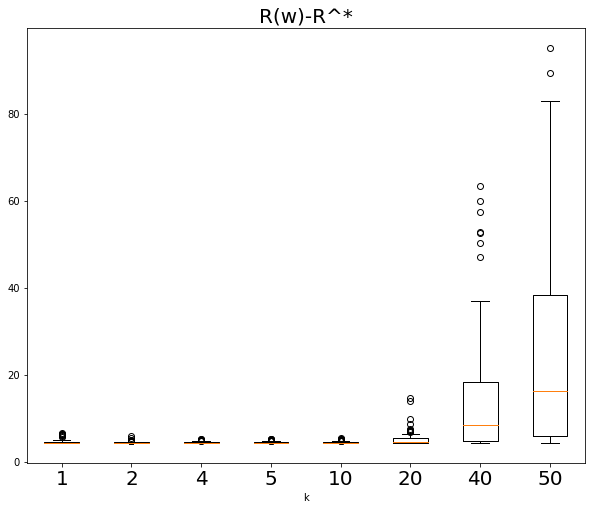

In [36]:
columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k')

plt.show()

In [39]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19,39,49]],columns=columns)

In [40]:
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.588081,4.444776,4.455358,4.449367,4.464939,5.214407,14.290769,25.300950
std,0.477657,0.236961,0.211068,0.206253,0.223199,1.655043,13.900341,22.994895
min,4.302081,4.302080,4.302091,4.302105,4.302081,4.302393,4.302976,4.304743
25%,4.325956,4.315193,4.324308,4.317896,4.327352,4.367408,4.738067,5.951841
50%,4.408862,4.352743,4.371537,4.358210,4.384979,4.615471,8.346427,16.270268
75%,4.641713,4.448247,4.496378,4.484407,4.480308,5.370045,18.340454,38.438803
max,6.573506,5.873218,5.325201,5.165473,5.527809,14.777752,63.483777,95.269916
